In [80]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dfs = []

for month in list(calendar.month_name[1:]):
    file_path = f'Sales_Data/Sales_{month}_2019.csv'
    df = pd.read_csv(file_path)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

df.to_csv('all_months_data.csv',index=False)

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# Reading the merged data

In [4]:
merged_data=pd.read_csv('all_months_data.csv')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Data Cleaning

In [5]:
merged_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
merged_data=merged_data.dropna()
merged_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Adding Month Column

In [7]:
merged_data['Order_Month']=merged_data['Order Date'].str[0:2]
merged_data['Order_Month'].unique()

array(['01', 'Or', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12'], dtype=object)

In [8]:
#Removing rows having Or as Order Month

merged_data= merged_data[merged_data['Order_Month']!='Or']

In [9]:
merged_data['Order_Month']=merged_data['Order_Month'].astype('int32')

In [10]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


## changing column data types

In [11]:
merged_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Order_Month          int32
dtype: object

In [12]:
merged_data['Order ID']=merged_data['Order ID'].astype('int32')
merged_data['Quantity Ordered']=merged_data['Quantity Ordered'].astype('int32')
merged_data['Price Each']=merged_data['Price Each'].astype('float32')

In [13]:


# Customer Insights
# 7. Customer Preferences
#    a. Are there any recurring customers (based on address)?
#    b. Do customers prefer certain products over others?
#    c. Is there a correlation between product price and quantity ordered?



# Miscellaneous
# 9. Order Completion
#    a. Are there any incomplete orders (e.g., missing data in fields)?
#    b. What is the overall data quality (e.g., consistency, missing values)?


# Order Information


#### adding total sales column

In [14]:
merged_data['Sales']=merged_data['Quantity Ordered']*merged_data['Price Each']

#### a. How many orders are there in the dataset?

In [15]:
print('Total orders are: ', merged_data.shape[0])

Total orders are:  185950


#### b. What is the total value of all the orders?
#### c. What is the average order value?

In [16]:
print('Total value of all the orders are: {:.2f}'.format(np.sum(merged_data.Sales)))
print('Average order value is : {:.2f}'.format(np.mean(merged_data.Sales)))

Total value of all the orders are: 34492035.80
Average order value is : 185.49


#### d. Which product has the highest quantity ordered?

In [17]:
most_ordered_products=merged_data[['Quantity Ordered','Product']].groupby(['Product']).sum()

In [18]:
most_ordered_products=most_ordered_products.sort_values(by='Quantity Ordered',ascending=False)

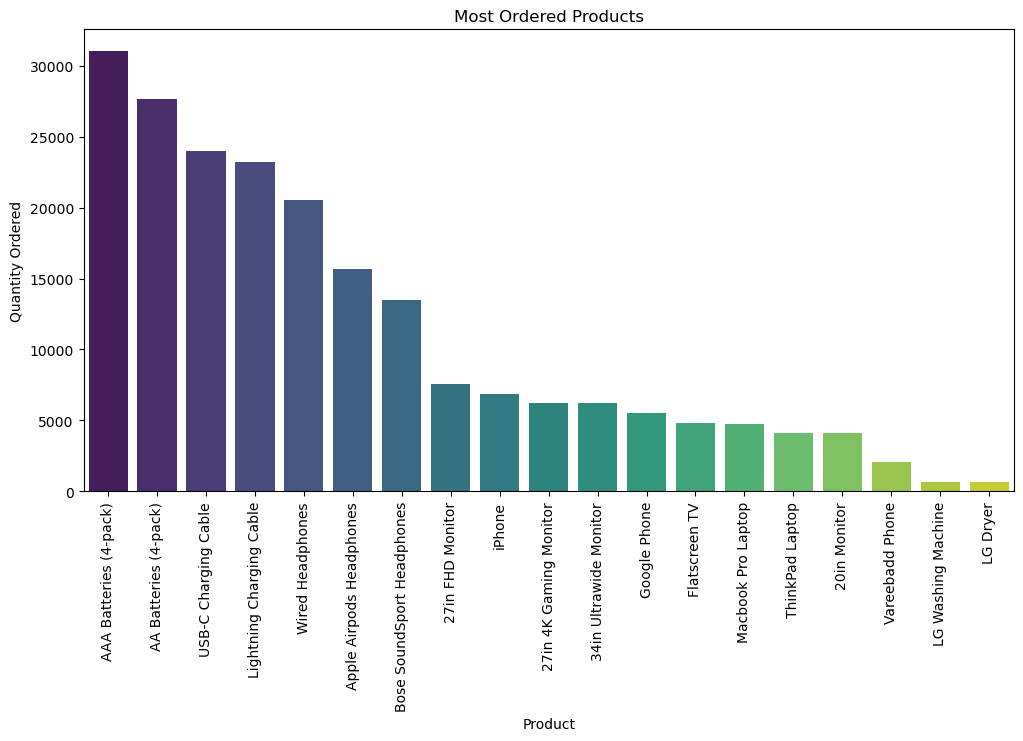

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_ordered_products.index, y=most_ordered_products['Quantity Ordered'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Most Ordered Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

In [143]:
avg_price=merged_data.groupby('Product').mean()['Price Each']
most_ordered_products=merged_data[['Quantity Ordered','Product']].groupby(['Product']).sum()

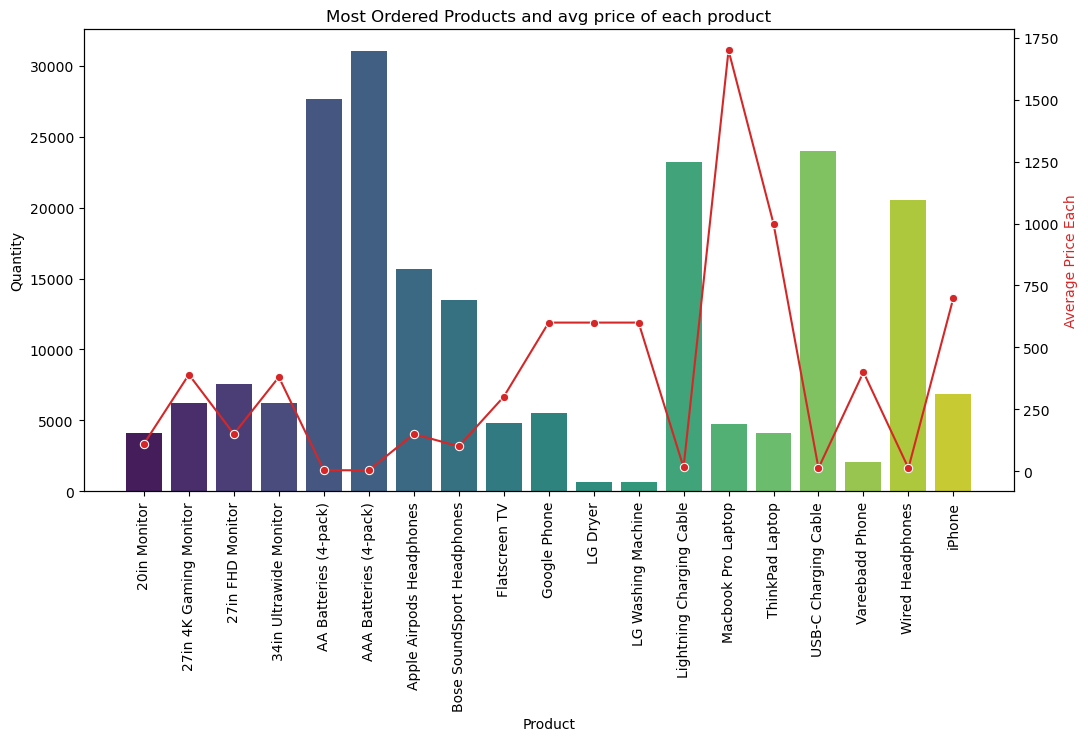

In [145]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = sns.barplot(x=most_ordered_products.index, y=most_ordered_products['Quantity Ordered'], palette='viridis', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Most Ordered Products and avg price of each product')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity')
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.yaxis.get_major_formatter().set_scientific(False)

# Create the line plot for average price on the same axes
ax2 = ax1.twinx()
sns.lineplot(x=avg_price.index, y=avg_price, marker='o', color='tab:red', ax=ax2)
ax2.set_ylabel('Average Price Each', color='tab:red')

plt.show()

In [146]:
# we can see that most sold item is AAA batteries (4 pack).
# Quantities sold has a direct relation with the price

## Product Analysis


#### a. Which product is the most frequently ordered?

In [21]:
print("Most frequently ordered item is:", f'AAA batteries (4 pack)')

Most frequently ordered item is: AAA batteries (4 pack)


#### b. Which product generates the most revenue?

In [22]:
most_valued_orders=merged_data[['Sales','Product']].groupby(['Product']).sum()
most_valued_orders=most_valued_orders.sort_values(by='Sales',ascending=False)
print(most_valued_orders.iloc[:1])

                        Sales
Product                      
Macbook Pro Laptop  8037600.0


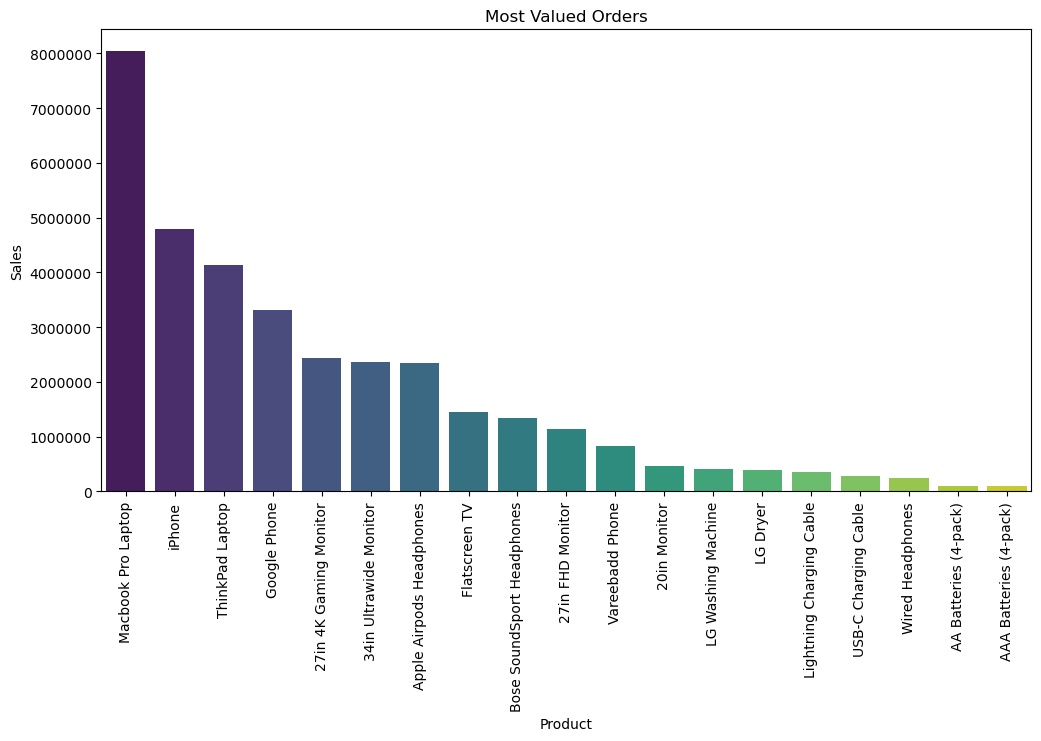

In [23]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x=most_valued_orders.index, y=most_valued_orders['Sales'], palette='viridis')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Most Valued Orders')
ax2.set_xlabel('Product')
ax2.set_ylabel('Sales')
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [24]:
# whereas Macbook Pro Laptop despite of being sold in quantities it brought most sales

In [25]:
# 23.3% of total sales amount has come from Macbook Pro Laptop alone

#### c. What is the average price of the products?

In [26]:
print("Avg price of the product is: {:.2f}".format(np.mean(merged_data['Price Each'])))
print("Median price of the product is: {:.2f}".format(np.median(merged_data['Price Each'])))

Avg price of the product is: 184.40
Median price of the product is: 14.95


#### d. How many unique products are there in the dataset?

In [27]:
print("No of unique products in the dataset are:",len(merged_data['Product'].unique()))

No of unique products in the dataset are: 19


# Quantity Analysis

####    a. What is the total quantity of each product ordered?
#### b. What is the average quantity ordered per product?

In [28]:
merged_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95


In [29]:
quantity_by_prod=merged_data[['Quantity Ordered','Product']].groupby('Product').sum()
quantity_by_prod=quantity_by_prod.sort_values('Quantity Ordered',ascending=False)

#### This data frame give the total quantity of each items sold

In [30]:
quantity_by_prod

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


#### b. What is the average quantity ordered per product?

In [31]:
avgquantity_by_prod=merged_data[['Quantity Ordered','Product']].groupby('Product').mean()
avgquantity_by_prod=avgquantity_by_prod.sort_values('Quantity Ordered',ascending=False)

#### This data frame give the avg quantity of each items sold

In [32]:
avgquantity_by_prod

,Quantity Ordered
Product,
AAA Batteries (4-pack),1.502689
AA Batteries (4-pack),1.343004
USB-C Charging Cable,1.094599
Wired Headphones,1.088709
Lightning Charging Cable,1.071983
Bose SoundSport Headphones,1.009906
Apple Airpods Headphones,1.007203
20in Monitor,1.006828
27in FHD Monitor,1.005728


# Date and Time Analysis

In [33]:
order_by_month=merged_data[['Quantity Ordered','Order_Month']].groupby('Order_Month').sum()
order_by_month.index = order_by_month.index.map(lambda x: calendar.month_abbr[x])

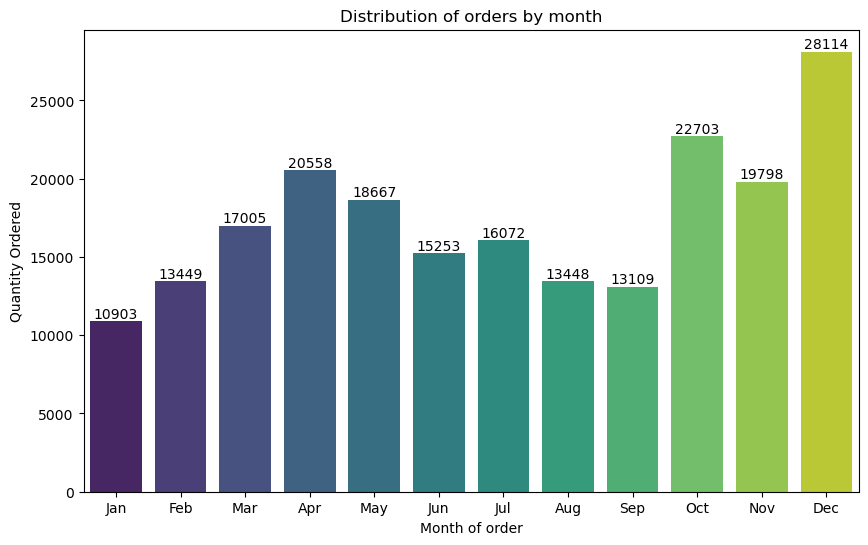

In [34]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=order_by_month.index,y=order_by_month['Quantity Ordered'],palette='viridis')
plt.title('Distribution of orders by month')
plt.xlabel('Month of order')

for index, value in enumerate(order_by_month['Quantity Ordered']):
    ax.text(index, value, f'{value}', color='black', ha="center", va="bottom")
plt.show()

#### a. Which month has the highest number of orders?


In [35]:
print("December has the highest sales among all 12 months")

December has the highest sales among all 12 months


In [36]:
# checking sales of top 3 items for each month

In [37]:
def top_5_products_per_month(df):
    top_products = []
    for i in range(1, 13):
        monthly_top_products = df[df['Order_Month'] == i]['Product'].value_counts().head(3)
        for product, count in monthly_top_products.items():
            top_products.append({'Month': calendar.month_abbr[i], 'Product': product, 'Count': count})
    return pd.DataFrame(top_products)

# Get the top 5 products per month
top_products_df = top_5_products_per_month(merged_data)

<Figure size 2500x2500 with 0 Axes>

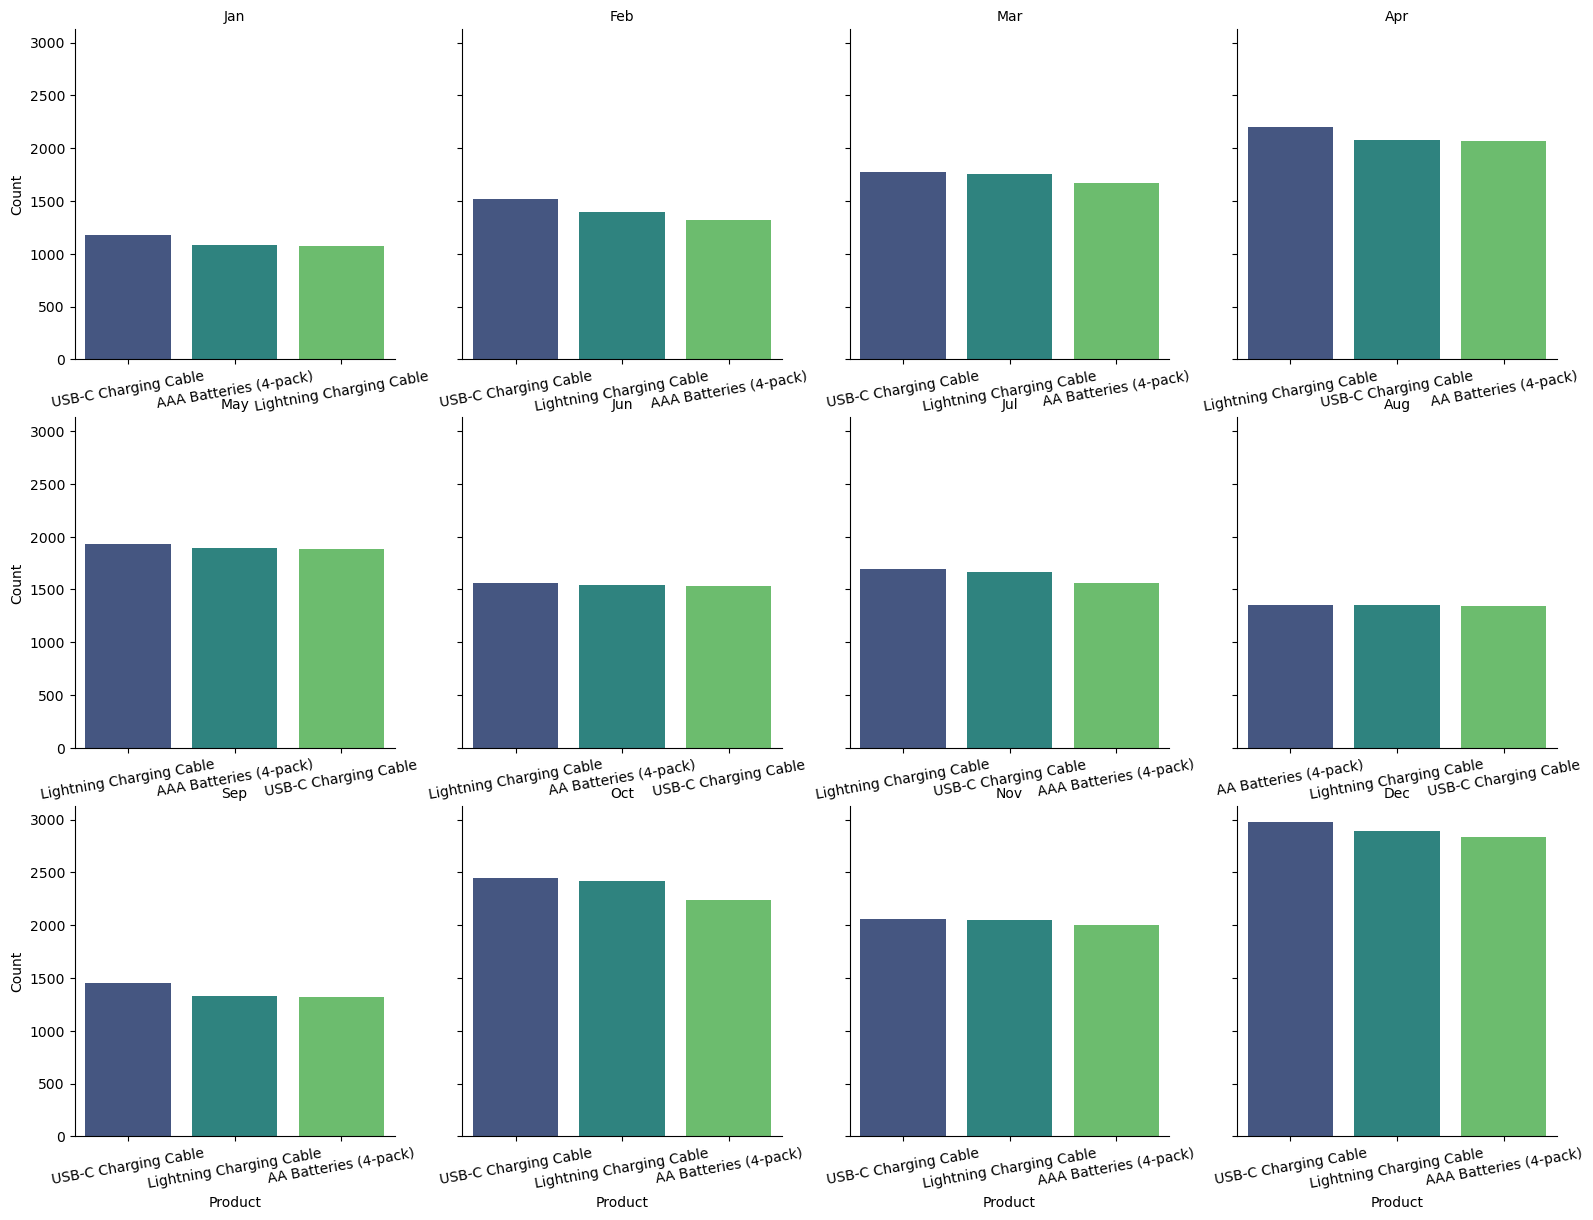

In [38]:
# Plotting using FacetGrid
plt.figure(figsize=(25,25))
g = sns.FacetGrid(top_products_df, col='Month', col_wrap=4, height=4, sharex=False, sharey=True)
g.map_dataframe(sns.barplot, x='Product', y='Count', palette='viridis')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Product", "Count")
g.set_xticklabels(rotation=10)
plt.show()

#### c. On which days are orders most frequently placed?


In [39]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000


In [40]:
merged_data['Date']=merged_data["Order Date"].str[3:5]
merged_data['Date']=merged_data['Date'].astype('int32')

In [41]:
order_by_date=merged_data[['Date','Quantity Ordered']].groupby(by='Date').sum()
order_by_date=order_by_date.sort_values('Quantity Ordered',ascending=False)
print(order_by_date.head(5))

      Quantity Ordered
Date                  
13                7112
26                7018
19                7009
17                6972
10                6965


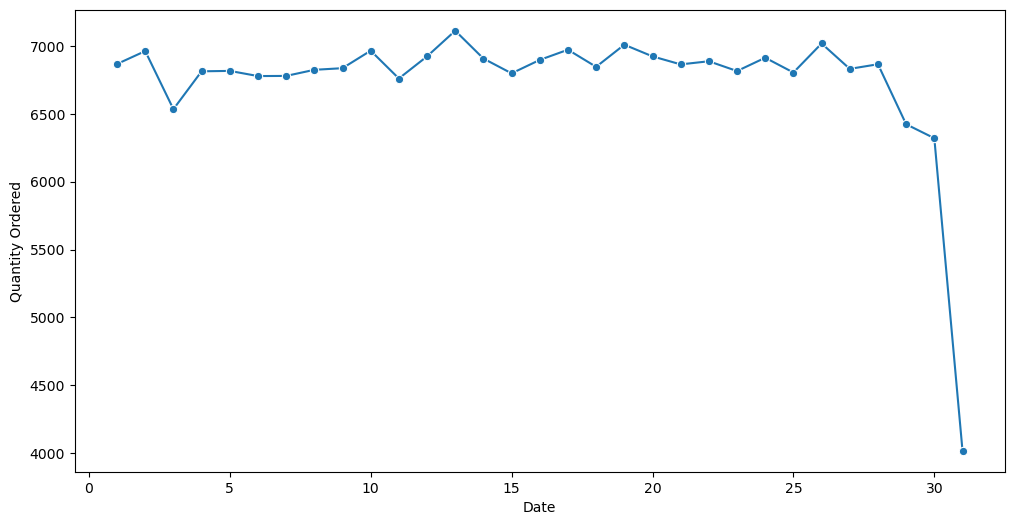

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(x=order_by_date.index,y=order_by_date['Quantity Ordered'],marker='o')
plt.show()

In [43]:
# we can see an uniform distribution of purchasing pattern but with a sharp decline at the end of the month.
# 13th and 26th have seen the highest quantity of sales

#### d. At what times of the day are orders most commonly placed?

In [44]:
merged_data['Order_Hour']=merged_data['Order Date'].str[9:11]
merged_data['Order_Hour']=merged_data['Order_Hour'].astype('int32')

In [45]:
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 14:
        return 'Noon'
    elif 14 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

merged_data['Time_Period'] = merged_data['Order_Hour'].apply(categorize_hour)

In [46]:
order_by_time_period=merged_data[['Quantity Ordered','Time_Period']].groupby('Time_Period').sum()
order_by_time_period=order_by_time_period.sort_values(by='Quantity Ordered',ascending=False)


In [47]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Sales,Date,Order_Hour,Time_Period
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000,22,21,Night
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000,28,14,Afternoon
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000,17,13,Noon
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005,5,20,Evening
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000,25,11,Morning


In [48]:
order_by_hour=merged_data[['Order_Hour','Quantity Ordered']].groupby(by='Order_Hour').sum()
order_by_hour.sort_values(by="Quantity Ordered",ascending=False).head(10)

,Quantity Ordered
Order_Hour,
19,14470
12,14202
11,14005
18,13802
20,13768
13,13685
14,12362
10,12308
21,12244


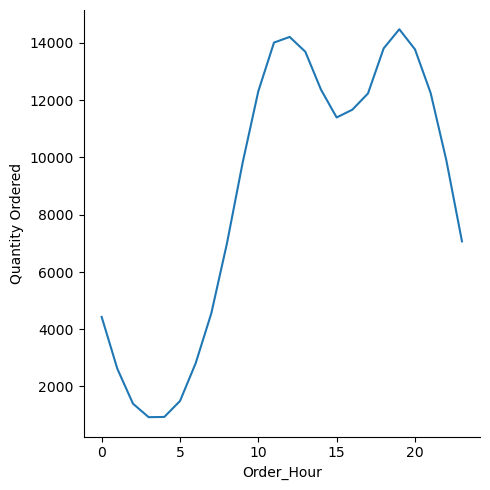

In [49]:
sns.relplot(x=order_by_hour.index,y=order_by_hour['Quantity Ordered'],kind='line')
plt.show()

In [50]:
# around 6-7pm and 11-12pm most orders came

In [51]:
# order quantity by Time Period

In [52]:
order_by_time_period

,Quantity Ordered
Time_Period,
Morning,51990
Afternoon,47644
Evening,42040
Night,39518
Noon,27887


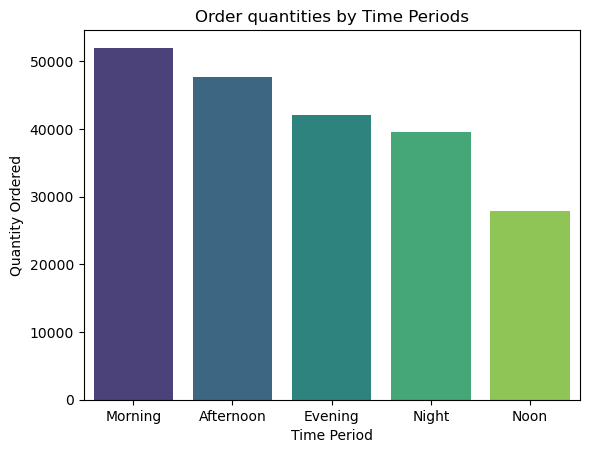

In [53]:
sns.barplot(x=order_by_time_period.index,y=order_by_time_period['Quantity Ordered'],palette='viridis')
plt.title('Order quantities by Time Periods')
plt.xlabel('Time Period')
plt.show()

In [54]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Sales,Date,Order_Hour,Time_Period
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000,22,21,Night
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000,28,14,Afternoon
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000,17,13,Noon
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005,5,20,Evening
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000,25,11,Morning


# Geographical Analysis

In [55]:
#creating city and state columns

In [56]:
merged_data['city']=merged_data['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+x.split(',')[2].split(' ')[1])
merged_data['state']=merged_data['city'].apply(lambda x: x.split(' ')[2])

#### a. Which city has the highest number of orders?

In [57]:
order_by_city=merged_data[['city','Quantity Ordered']].groupby(by='city').sum()
order_by_city=order_by_city.sort_values('Quantity Ordered',ascending=False)

In [58]:
order_by_city

,Quantity Ordered
city,
San Francisco CA,50239
Los Angeles CA,33289
New York City NY,27932
Boston MA,22528
Dallas TX,16730
Atlanta GA,16602
Seattle WA,16553
Portland OR,11303
Austin TX,11153


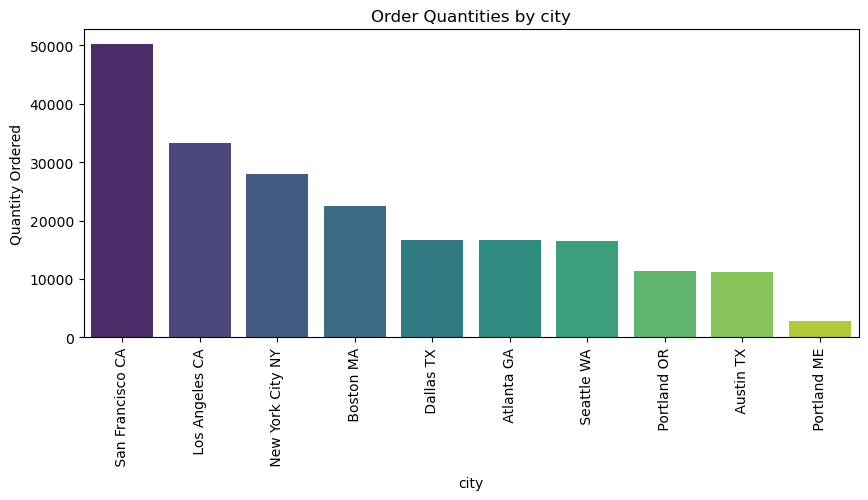

In [59]:
plt.figure(figsize=(10,4))
sns.barplot(x=order_by_city.index,y=order_by_city['Quantity Ordered'],palette='viridis')
plt.xticks(rotation=90)
plt.title('Order Quantities by city')
plt.show()

#### avg revenue for each city

In [60]:
order_value_by_city=merged_data[['city','Sales']].groupby(by='city').mean()
order_value_by_city=order_value_by_city.sort_values('Sales',ascending=False)

In [61]:
order_value_by_city

,Sales
city,
Atlanta GA,187.856902
New York City NY,187.502710
Portland OR,186.886347
Dallas TX,186.772968
Seattle WA,186.516119
San Francisco CA,184.704549
Los Angeles CA,184.177361
Austin TX,183.703356
Boston MA,183.688271


#### b. Which state has the highest revenue?

In [62]:
order_value_by_state=merged_data[['state','Sales']].groupby(by='state').mean()
order_value_by_state=order_value_by_state.sort_values('Sales',ascending=False)

In [63]:
order_value_by_state

,Sales
state,
GA,187.856902
York,187.502710
OR,186.886347
WA,186.516119
TX,185.543261
Francisco,184.704549
Angeles,184.177361
MA,183.688271
ME,183.200924


In [64]:
# GA and New York has the highest avg revenue

#### c. What is the distribution of orders by state?

In [65]:
order_by_state=merged_data[['state','Sales']].groupby(by='state').sum()
order_by_state=order_by_state.sort_values('Sales',ascending=False)

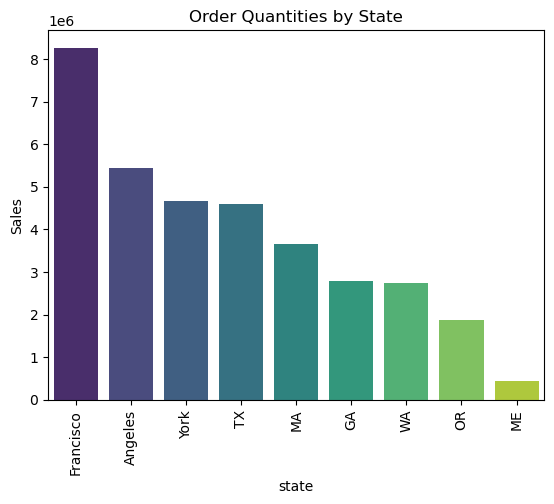

In [66]:
sns.barplot(x=order_by_state.index,y=order_by_state['Sales'],palette='viridis')
plt.xticks(rotation=90)
plt.title('Order Quantities by State')
plt.show()

#### d. Which address has the most orders?

In [67]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Sales,Date,Order_Hour,Time_Period,city,state
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000,22,21,Night,Boston MA,MA
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000,28,14,Afternoon,Portland OR,OR
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000,17,13,Noon,San Francisco CA,Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005,5,20,Evening,Los Angeles CA,Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000,25,11,Morning,Austin TX,TX


In [68]:
order_by_address=merged_data[['Quantity Ordered','Purchase Address']].groupby(by='Purchase Address').sum()
order_by_address=order_by_address.sort_values(by='Quantity Ordered',ascending=False)

In [69]:
order_by_address.head()

,Quantity Ordered
Purchase Address,
"338 Hickory St, Los Angeles, CA 90001",12
"716 5th St, San Francisco, CA 94016",11
"60 10th St, San Francisco, CA 94016",11
"413 Ridge St, San Francisco, CA 94016",10
"927 Jefferson St, New York City, NY 10001",10


In [70]:
# Above are the address from which most quantity of orders came

In [71]:
order_value_by_address=merged_data[['Sales','Purchase Address']].groupby(by='Purchase Address').sum()
order_value_by_address=round(order_value_by_address.sort_values(by='Sales',ascending=False),2)

In [72]:
order_value_by_address.head()

,Sales
Purchase Address,
"668 Park St, San Francisco, CA 94016",4379.99
"391 1st St, Seattle, WA 98101",4100.00
"795 1st St, Atlanta, GA 30301",4100.00
"10 1st St, San Francisco, CA 94016",4000.00
"731 11th St, New York City, NY 10001",3919.88


In [73]:
merged_data[merged_data['Purchase Address']=='668 Park St, San Francisco, CA 94016']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Sales,Date,Order_Hour,Time_Period,city,state
9379,150173,Google Phone,1,600.00000,01/18/19 09:16,"668 Park St, San Francisco, CA 94016",1,600.00000,18,9,Morning,San Francisco CA,Francisco
41702,181069,Macbook Pro Laptop,2,1700.00000,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.00000,27,21,Night,San Francisco CA,Francisco
41703,181069,34in Ultrawide Monitor,1,379.98999,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,379.98999,27,21,Night,San Francisco CA,Francisco


In [74]:
# Above are the address from which most valued orders came

### Two products often sold together

In [81]:
dup_df=merged_data[merged_data['Order ID'].duplicated(keep=False)]
dup_df['grouped_prod']=dup_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [82]:
dup_df=dup_df[['Order ID','grouped_prod']].drop_duplicates(ignore_index=True)

In [83]:
dup_df

,Order ID,grouped_prod
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones"
7134,319596,"iPhone,Lightning Charging Cable"


In [84]:
from collections import Counter
from itertools import combinations
count=Counter()

for row in dup_df['grouped_prod']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [85]:
count.most_common(20)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

# Purchase Behavior


In [97]:
merged_data['state'].unique()

array(['MA', 'OR', 'Francisco', 'Angeles', 'TX', 'GA', 'WA', 'York', 'ME'],
      dtype=object)

In [108]:
top_products = []
for state in merged_data['state'].unique():
    top5 = merged_data[merged_data['state'] == state]['Product'].value_counts().head(5)
    for product, count in top5.items():
        top_products.append((state, product, count))

# Convert to a DataFrame
top_products_df = pd.DataFrame(top_products, columns=['State', 'Product', 'Count'])

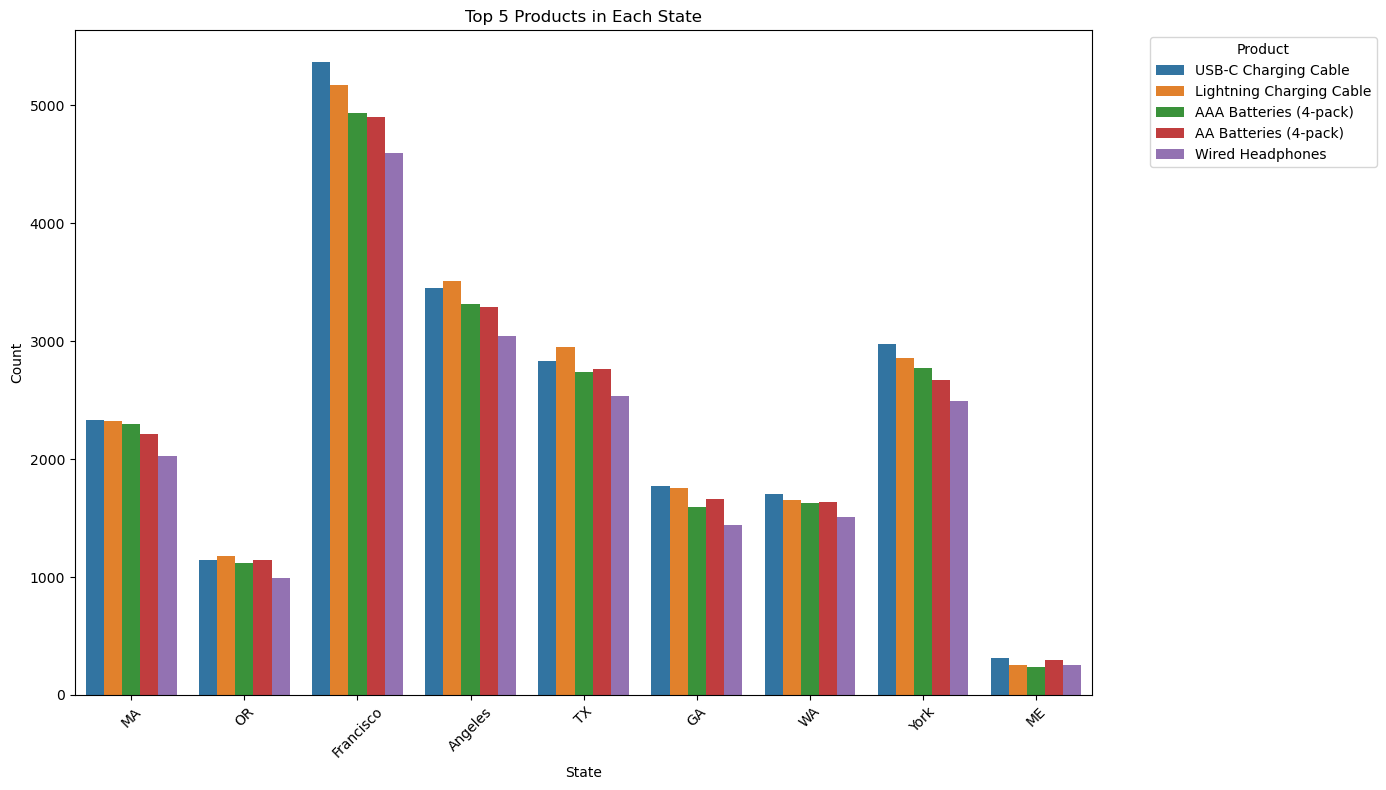

In [109]:
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Count', hue='Product', data=top_products_df)

plt.title('Top 5 Products in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales Insights

#### a. Which orders have the highest total value?

In [116]:
most_valued_orders.head(1)

,Sales
Product,
Macbook Pro Laptop,8037600.0


#### b. What is the total revenue generated by each product?

In [117]:
most_valued_orders

,Sales
Product,
Macbook Pro Laptop,8.037600e+06
iPhone,4.794300e+06
ThinkPad Laptop,4.129959e+06
Google Phone,3.319200e+06
27in 4K Gaming Monitor,2.435097e+06
34in Ultrawide Monitor,2.355558e+06
Apple Airpods Headphones,2.349150e+06
Flatscreen TV,1.445700e+06
Bose SoundSport Headphones,1.345565e+06


#### c. What is the revenue trend over the months?

In [124]:
revenue_by_month=merged_data[['Sales','Order_Month']].groupby(by='Order_Month').sum()
revenue_by_month.index = revenue_by_month.index.map(lambda x: calendar.month_abbr[x])


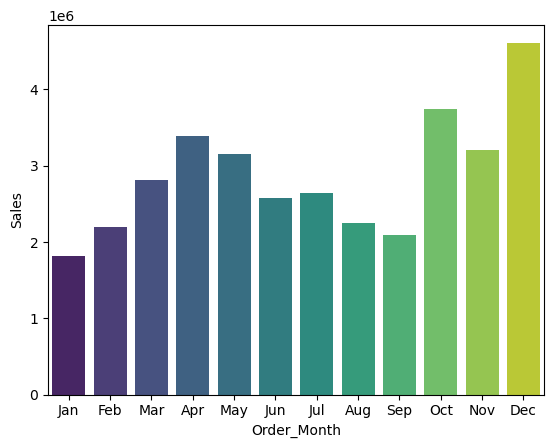

In [126]:
sns.barplot(x=revenue_by_month.index,y=revenue_by_month['Sales'],palette='viridis')
plt.show()

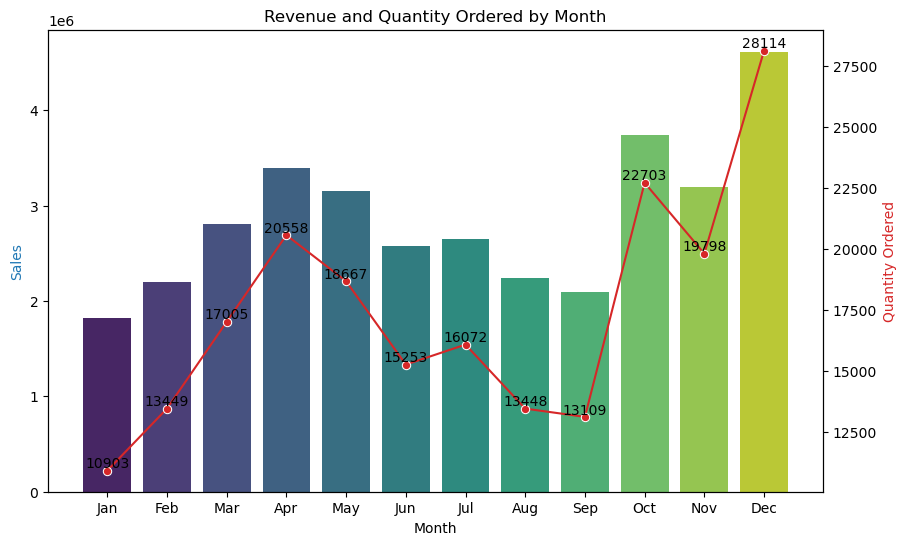

In [128]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=revenue_by_month.index, y=revenue_by_month['Sales'], palette='viridis', ax=ax1)
ax1.set_title('Revenue and Quantity Ordered by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color='tab:blue')

ax2 = ax1.twinx()
sns.lineplot(x=order_by_month.index, y=order_by_month['Quantity Ordered'], marker='o', color='tab:red', ax=ax2)
ax2.set_ylabel('Quantity Ordered', color='tab:red')

for index, value in enumerate(order_by_month['Quantity Ordered']):
    ax2.text(index, value, f'{value}', color='black', ha="center", va="bottom")

plt.show()